In [46]:
import os
from dotenv import load_dotenv 
load_dotenv("../../constants/.env")

True

# Paper Trading with Python and Binance - the Spot Testnet API

More Information and getting the Credentials: https://testnet.binance.vision/

__Insert your Spot Testnet Credentials here__:

In [47]:
api_key = os.environ.get('BINANCE_KEY')
secret_key = os.environ.get('BINANCE_SECRET')

## Creating a Connection to the Spot Testnet

In [48]:
from binance.client import Client

In [49]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com") # Testnet!!!

__Simple Rule:__ <br>
Use your __Testnet Credentials with testnet = True__ and your __"Real Account" Credentials with testnet = False__ (default)

In [13]:
client

In [14]:
client.get_account() # Test account details

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00100000',
  'taker': '0.00100000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1729790306845,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00000000', 'locke

## Spot Testnet API - Overview

__Same Documentation applies for Spot Testnet:__

https://binance-docs.github.io/apidocs/spot/en/#introduction

In [15]:
import pandas as pd
from binance.client import Client

In [16]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) # Testnet!!!

In [17]:
client.get_system_status()

{'status': 0, 'msg': 'normal'}

In [18]:
account = client.get_account()
account

BinanceAPIException: APIError(code=-2015): Invalid API-key, IP, or permissions for action.

In [11]:
df = pd.DataFrame(account["balances"])
df

,asset,free,locked
0,ETH,1.00000000,0.00000000
1,BTC,1.13556000,0.00000000
2,LTC,7.00000000,0.00000000
3,BNB,1.00000000,0.00000000
4,USDT,676.67783910,0.00000000
...,...,...,...
391,TURBO,18446.00000000,0.00000000
392,1MBABYDOGE,18446.00,0.00
393,CATI,1121.00000000,0.00000000
394,HMSTR,18446.00,0.00


In [12]:
df.free = pd.to_numeric(df.free, errors = "coerce")
df.locked = pd.to_numeric(df.locked, errors = "coerce")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   asset   396 non-null    object 
 1   free    396 non-null    float64
 2   locked  396 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.4+ KB


In [14]:
client.get_asset_balance(asset = "BTC")

{'asset': 'BTC', 'free': '1.13556000', 'locked': '0.00000000'}

In [15]:
client.get_asset_balance(asset = "ETH")

{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'}

In [16]:
client.get_asset_balance(asset = "EUR")

{'asset': 'EUR', 'free': '452.00000000', 'locked': '0.00000000'}

In [17]:
client.get_symbol_ticker(symbol = "BTCUSDT") # current price for one symbol

{'symbol': 'BTCUSDT', 'price': '67901.27000000'}

In [18]:
# get current prices for all pairs
client.get_all_tickers()

[{'symbol': 'ETHBTC', 'price': '0.03720000'},
 {'symbol': 'LTCBTC', 'price': '0.00104800'},
 {'symbol': 'BNBBTC', 'price': '0.00873400'},
 {'symbol': 'BTCUSDT', 'price': '67901.27000000'},
 {'symbol': 'ETHUSDT', 'price': '2528.92000000'},
 {'symbol': 'TRXBTC', 'price': '0.00000243'},
 {'symbol': 'XRPBTC', 'price': '0.00000783'},
 {'symbol': 'BNBUSDT', 'price': '593.00000000'},
 {'symbol': 'LTCUSDT', 'price': '71.20000000'},
 {'symbol': 'LTCBNB', 'price': '0.12020000'},
 {'symbol': 'XRPUSDT', 'price': '0.53170000'},
 {'symbol': 'XRPBNB', 'price': '0.00089780'},
 {'symbol': 'TRXBNB', 'price': '0.00027810'},
 {'symbol': 'TRXUSDT', 'price': '0.16490000'},
 {'symbol': 'NEOBTC', 'price': '0.00014860'},
 {'symbol': 'QTUMETH', 'price': '0.00093500'},
 {'symbol': 'EOSETH', 'price': '0.00018670'},
 {'symbol': 'SNTETH', 'price': '0.00001034'},
 {'symbol': 'BNTETH', 'price': '0.00020000'},
 {'symbol': 'GASBTC', 'price': '0.00006090'},
 {'symbol': 'BNBETH', 'price': '0.23440000'},
 {'symbol': 'LRCB

In [19]:
pd.DataFrame(client.get_all_tickers())

,symbol,price
0,ETHBTC,0.03720000
1,LTCBTC,0.00104800
2,BNBBTC,0.00873400
3,BTCUSDT,67901.27000000
4,ETHUSDT,2528.92000000
...,...,...
1258,EIGENUSDT,3.20200000
1259,EIGENFDUSD,3.19100000
1260,EIGENTRY,109.80000000
1261,NEIROBRL,0.00835400


In [19]:
last24 = client.get_ticker(symbol = "ETHUSDT") # 24H Price change statistic
last24

{'symbol': 'ETHUSDT',
 'priceChange': '-28.85000000',
 'priceChangePercent': '-1.183',
 'weightedAvgPrice': '2444.30667613',
 'prevClosePrice': '0.00000000',
 'lastPrice': '2409.55000000',
 'lastQty': '0.19100000',
 'bidPrice': '2409.54000000',
 'bidQty': '0.17440000',
 'askPrice': '2409.56000000',
 'askQty': '0.19300000',
 'openPrice': '2438.40000000',
 'highPrice': '2498.92000000',
 'lowPrice': '2377.23000000',
 'volume': '3293.52390000',
 'quoteVolume': '8050382.45677000',
 'openTime': 1730758874402,
 'closeTime': 1730845274402,
 'firstId': 0,
 'lastId': 38664,
 'count': 38665}

In [26]:
timestamp = client._get_earliest_valid_timestamp(symbol = "BTCUSDT", interval = "1d")
timestamp

1730764800000

In [61]:
pd.to_datetime(timestamp, unit = "ms") # reset every month!!!

Timestamp('2024-11-05 00:00:00')

In [62]:
def get_history(symbol, interval, start, end = None):
    bars = client.get_historical_klines(symbol = symbol, interval = interval,
                                        start_str = start, end_str = end, limit = 100)
    df = pd.DataFrame(bars)
    df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")
    df.columns = ["Open Time", "Open", "High", "Low", "Close", "Volume",
                  "Clos Time", "Quote Asset Volume", "Number of Trades",
                  "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore", "Date"]
    df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()
    df.set_index("Date", inplace = True)
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors = "coerce")
    
    return df

In [63]:
from datetime import datetime, timedelta
from pytz import UTC
past = str(datetime.now(UTC) - timedelta(days=1))

df = get_history(symbol = "ETHUSDT", interval = "1m", start = past)
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-11-04 23:11:00,2402.61,2404.68,2402.28,2402.29,219.5220
2024-11-04 23:12:00,2402.28,2403.08,2401.72,2402.77,98.9622
2024-11-04 23:13:00,2402.76,2402.76,2400.86,2401.71,75.2329
2024-11-04 23:14:00,2401.70,2401.71,2397.49,2398.41,315.4588
2024-11-04 23:15:00,2398.44,2400.36,2397.20,2397.21,179.9207
...,...,...,...,...,...
2024-11-05 23:06:00,2434.22,2434.40,2432.15,2433.64,133.0523
2024-11-05 23:07:00,2433.63,2433.81,2432.15,2432.55,87.9464
2024-11-05 23:08:00,2432.56,2433.59,2432.15,2432.60,94.0003


In [53]:
df = get_history(symbol = "BTCUSDT", interval = "1m", start = "2021-09-15")
df

KeyboardInterrupt: 

### ++++++ Update (August 2023) ++++++++

There are two alterantives to stream live data with python-binance:
- using __ThreadedWebsocketManager__ -or-
- using __BinanceSocketManager (newly added to the course)__

__What´s the benefit of covering both options?__<br>
-> We can now __run Trading Bots in Jupyter and as a Script__ with the __latest Versions__ for Python and Python-Binance. No need to care about Versions and Installations anymore!

For more information, please go back to the previous Lectures (API Intro)!

### Option 1: ThreadedWebsocketManager (only executable in scripts, not in Jupyter!):

In [ ]:
from binance import ThreadedWebsocketManager

In [ ]:
def stream_data(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = msg["c"]
    
    print("Time: {} | Price: {}".format(time, price))

In [ ]:
# initialize and start the WebSocket
twm = ThreadedWebsocketManager()
twm.start()

In [ ]:
# subscribe to the stream
twm.start_symbol_miniticker_socket(callback = stream_data, symbol = "BTCUSDT")

In [ ]:
# stop the Websocket/Stream after 20 seconds
while True:
    time.sleep(20)
    twm.stop()
    break

---------------------------

### Option 2: BinanceSocketManager (executable in Jupyter!):

In [ ]:
stream_data

In [ ]:
import asyncio
from binance import AsyncClient, BinanceSocketManager

In [ ]:
async def main():
    client = await AsyncClient.create()
    bm = BinanceSocketManager(client)
    ts = bm.symbol_miniticker_socket(symbol = "BTCUSDT")
    
    async with ts as tscm:
        for _ in range(10):
            res = await tscm.recv()
            stream_data(res)

    await client.close_connection()
await main()

## Placing a Market Buy Order

In [24]:
from binance.client import Client
import pandas as pd

In [25]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [32]:
client.get_account() 

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1729794360879,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.13556000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '676.67783910', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '3254.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '847.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '50.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '207.00000000

In [33]:
last24 = client.get_ticker(symbol = "BTCUSDT") # 24H Price change statistic
last24

{'symbol': 'BTCUSDT',
 'priceChange': '2319.99000000',
 'priceChangePercent': '3.538',
 'weightedAvgPrice': '66524.54818919',
 'prevClosePrice': '65565.95000000',
 'lastPrice': '67885.99000000',
 'lastQty': '0.15587000',
 'bidPrice': '67885.99000000',
 'bidQty': '0.76911000',
 'askPrice': '67913.58000000',
 'askQty': '0.00391000',
 'openPrice': '65566.00000000',
 'highPrice': '70129.00000000',
 'lowPrice': '30294.00000000',
 'volume': '561.56608000',
 'quoteVolume': '37357929.75037410',
 'openTime': 1729708169060,
 'closeTime': 1729794569060,
 'firstId': 2560918,
 'lastId': 2698403,
 'count': 137486}

In [34]:
# buy 0.1 BTC
order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.0001)

In [35]:
order

{'symbol': 'BTCUSDT',
 'orderId': 11526517,
 'orderListId': -1,
 'clientOrderId': 'WJAWbHiYRX7dLtxpeGPvxz',
 'transactTime': 1729794577805,
 'price': '0.00000000',
 'origQty': '0.00010000',
 'executedQty': '0.00010000',
 'cummulativeQuoteQty': '6.79277520',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'BUY',
 'workingTime': 1729794577805,
 'fills': [{'price': '67915.26000000',
   'qty': '0.00001000',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 2698421},
  {'price': '67929.14000000',
   'qty': '0.00009000',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 2698422}],
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [42]:
df = pd.DataFrame(order["fills"])
df

,price,qty,commission,commissionAsset,tradeId
0,68798.01000000,0.00001000,0.00000000,BTC,2071997
1,68798.03000000,0.00596000,0.00000000,BTC,2071998
2,68798.05000000,0.00698000,0.00000000,BTC,2071999
3,68798.06000000,0.00466000,0.00000000,BTC,2072000
4,68798.63000000,0.00371000,0.00000000,BTC,2072001
5,68801.17000000,0.00415000,0.00000000,BTC,2072002
6,68802.69000000,0.00407000,0.00000000,BTC,2072003
7,68803.03000000,0.00531000,0.00000000,BTC,2072004
8,68803.53000000,0.00618000,0.00000000,BTC,2072005
9,68804.28000000,0.00473000,0.00000000,BTC,2072006


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            19 non-null     object
 1   qty              19 non-null     object
 2   commission       19 non-null     object
 3   commissionAsset  19 non-null     object
 4   tradeId          19 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 892.0+ bytes


In [36]:
num_columns = ["price", "qty", "commission"]

In [46]:
for column in num_columns:
    df[column] = pd.to_numeric(df[column], errors = "coerce")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            19 non-null     float64
 1   qty              19 non-null     float64
 2   commission       19 non-null     float64
 3   commissionAsset  19 non-null     object 
 4   tradeId          19 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 892.0+ bytes


In [48]:
df.qty.sum()

np.float64(0.1)

In [49]:
df.price.mul(df.qty).sum()

np.float64(6881.1239817)

In [10]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1729966551359,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.13581000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '659.75916680', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '3254.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '847.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '50.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '207.00000000

In [8]:
# buy BTC for 1,000 USDT 
order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quoteOrderQty = 10)

In [9]:
order

{'symbol': 'BTCUSDT',
 'orderId': 12451290,
 'orderListId': -1,
 'clientOrderId': 'b6KWH97kTuiUSMmixyUmpa',
 'transactTime': 1729966551359,
 'price': '0.00000000',
 'origQty': '0.00014000',
 'executedQty': '0.00014000',
 'cummulativeQuoteQty': '9.39687140',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'BUY',
 'workingTime': 1729966551359,
 'fills': [{'price': '67120.51000000',
   'qty': '0.00014000',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 2928947}],
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [11]:
avr_price = float(order["cummulativeQuoteQty"]) / float(order["origQty"]) 
avr_price

67120.51000000001

In [12]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1729966551359,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.13581000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '659.75916680', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '3254.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '847.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '50.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '207.00000000

## Placing a Market Sell Order

In [13]:
# selling 0.118011 BTC 
order = client.create_order(symbol = "BTCUSDT", side = "SELL", type = "MARKET", quoteOrderQty = 10)

In [14]:
order

{'symbol': 'BTCUSDT',
 'orderId': 12452499,
 'orderListId': -1,
 'clientOrderId': 'bwqYm27526mr6lkjhpEmAY',
 'transactTime': 1729966787379,
 'price': '0.00000000',
 'origQty': '0.00014000',
 'executedQty': '0.00014000',
 'cummulativeQuoteQty': '9.39344140',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'SELL',
 'workingTime': 1729966787379,
 'fills': [{'price': '67096.01000000',
   'qty': '0.00014000',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 2929117}],
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [15]:
client.get_account() # Test account details

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1729966787379,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.13567000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '669.15260820', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '3254.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '847.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '50.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '207.00000000

## Placing Limit Orders

In [58]:
from binance.client import Client
import pandas as pd

In [59]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [60]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1729292078853,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.01456000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '8941.17117930', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '3254.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '847.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '50.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '207.0000000

In [62]:
client.get_symbol_ticker(symbol = "BTCUSDT") # current price

{'symbol': 'BTCUSDT', 'price': '68205.60000000'}

__Limit Buy Order__

In [63]:
order1 = client.create_order(symbol="BTCUSDT", side = "BUY", type = "LIMIT",
                            quantity = 0.1, timeInForce = "GTC", price = 60000)

In [64]:
order1

{'symbol': 'BTCUSDT',
 'orderId': 8689779,
 'orderListId': -1,
 'clientOrderId': 'AetMTMPTUEdYowwMYEjCRO',
 'transactTime': 1729292414183,
 'price': '60000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'NEW',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'BUY',
 'workingTime': 1729292414183,
 'fills': [],
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [65]:
order_id_buy = order1["orderId"]
order_id_buy

8689779

In [66]:
client.get_order(symbol = "BTCUSDT", orderId = order_id_buy)

{'symbol': 'BTCUSDT',
 'orderId': 8689779,
 'orderListId': -1,
 'clientOrderId': 'AetMTMPTUEdYowwMYEjCRO',
 'price': '60000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'NEW',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'BUY',
 'stopPrice': '0.00000000',
 'icebergQty': '0.00000000',
 'time': 1729292414183,
 'updateTime': 1729292414183,
 'isWorking': True,
 'workingTime': 1729292414183,
 'origQuoteOrderQty': '0.00000000',
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

__Limit Sell Order__

In [67]:
order2 = client.create_order(symbol="BTCUSDT", side = "SELL", type = "LIMIT",
                            quantity = 0.1, timeInForce = "GTC", price = 70000)

In [68]:
order2

{'symbol': 'BTCUSDT',
 'orderId': 8690179,
 'orderListId': -1,
 'clientOrderId': '46b9mjBa4UzUaIqlJ9FLos',
 'transactTime': 1729292479131,
 'price': '70000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'NEW',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'SELL',
 'workingTime': 1729292479131,
 'fills': [],
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [69]:
order_id_sell = order2["orderId"]
order_id_sell

8690179

In [70]:
open_orders = client.get_open_orders(symbol = "BTCUSDT")
open_orders

[{'symbol': 'BTCUSDT',
  'orderId': 8689779,
  'orderListId': -1,
  'clientOrderId': 'AetMTMPTUEdYowwMYEjCRO',
  'price': '60000.00000000',
  'origQty': '0.10000000',
  'executedQty': '0.00000000',
  'cummulativeQuoteQty': '0.00000000',
  'status': 'NEW',
  'timeInForce': 'GTC',
  'type': 'LIMIT',
  'side': 'BUY',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1729292414183,
  'updateTime': 1729292414183,
  'isWorking': True,
  'workingTime': 1729292414183,
  'origQuoteOrderQty': '0.00000000',
  'selfTradePreventionMode': 'EXPIRE_MAKER'},
 {'symbol': 'BTCUSDT',
  'orderId': 8690179,
  'orderListId': -1,
  'clientOrderId': '46b9mjBa4UzUaIqlJ9FLos',
  'price': '70000.00000000',
  'origQty': '0.10000000',
  'executedQty': '0.00000000',
  'cummulativeQuoteQty': '0.00000000',
  'status': 'NEW',
  'timeInForce': 'GTC',
  'type': 'LIMIT',
  'side': 'SELL',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1729292479131,
  'updateTime': 1729292479131,
 

In [71]:
pd.DataFrame(open_orders)

,symbol,orderId,orderListId,clientOrderId,price,origQty,executedQty,cummulativeQuoteQty,status,timeInForce,type,side,stopPrice,icebergQty,time,updateTime,isWorking,workingTime,origQuoteOrderQty,selfTradePreventionMode
0,BTCUSDT,8689779,-1,AetMTMPTUEdYowwMYEjCRO,60000.00000000,0.10000000,0.00000000,0.00000000,NEW,GTC,LIMIT,BUY,0.00000000,0.00000000,1729292414183,1729292414183,True,1729292414183,0.00000000,EXPIRE_MAKER
1,BTCUSDT,8690179,-1,46b9mjBa4UzUaIqlJ9FLos,70000.00000000,0.10000000,0.00000000,0.00000000,NEW,GTC,LIMIT,SELL,0.00000000,0.00000000,1729292479131,1729292479131,True,1729292479131,0.00000000,EXPIRE_MAKER


In [73]:
result = client.cancel_order(symbol = "BTCUSDT", orderId = order_id_buy)
result

{'symbol': 'BTCUSDT',
 'origClientOrderId': 'AetMTMPTUEdYowwMYEjCRO',
 'orderId': 8689779,
 'orderListId': -1,
 'clientOrderId': '5N84ctCfra82GlUve2Al5I',
 'transactTime': 1729292616280,
 'price': '60000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'CANCELED',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'BUY',
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [74]:
result = client.cancel_order(symbol = "BTCUSDT", orderId = order_id_sell)
result

{'symbol': 'BTCUSDT',
 'origClientOrderId': '46b9mjBa4UzUaIqlJ9FLos',
 'orderId': 8690179,
 'orderListId': -1,
 'clientOrderId': 'Ub4ioxXWp2IVI4YryZuFPW',
 'transactTime': 1729292617226,
 'price': '70000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'CANCELED',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'SELL',
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

## Reporting: Getting all (historical) Orders and Trades

In [75]:
from binance.client import Client
import pandas as pd

In [76]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [77]:
all_orders = client.get_all_orders(symbol = "BTCUSDT")
all_orders

[{'symbol': 'BTCUSDT',
  'orderId': 8615411,
  'orderListId': -1,
  'clientOrderId': '6DLFLiDnNoZdG5ujb3zVgE',
  'price': '0.00000000',
  'origQty': '0.10000000',
  'executedQty': '0.10000000',
  'cummulativeQuoteQty': '6881.12398170',
  'status': 'FILLED',
  'timeInForce': 'GTC',
  'type': 'MARKET',
  'side': 'BUY',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1729280045387,
  'updateTime': 1729280045387,
  'isWorking': True,
  'workingTime': 1729280045387,
  'origQuoteOrderQty': '0.00000000',
  'selfTradePreventionMode': 'EXPIRE_MAKER'},
 {'symbol': 'BTCUSDT',
  'orderId': 8618017,
  'orderListId': -1,
  'clientOrderId': 'MLWuLdZmNgQvwlByg6fPQ8',
  'price': '0.00000000',
  'origQty': '0.01456000',
  'executedQty': '0.01456000',
  'cummulativeQuoteQty': '999.54445040',
  'status': 'FILLED',
  'timeInForce': 'GTC',
  'type': 'MARKET',
  'side': 'BUY',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1729280514956,
  'updateTime': 172928051495

In [78]:
pd.DataFrame(all_orders)

,symbol,orderId,orderListId,clientOrderId,price,origQty,executedQty,cummulativeQuoteQty,status,timeInForce,type,side,stopPrice,icebergQty,time,updateTime,isWorking,workingTime,origQuoteOrderQty,selfTradePreventionMode
0,BTCUSDT,8615411,-1,6DLFLiDnNoZdG5ujb3zVgE,0.00000000,0.10000000,0.10000000,6881.12398170,FILLED,GTC,MARKET,BUY,0.00000000,0.00000000,1729280045387,1729280045387,True,1729280045387,0.00000000,EXPIRE_MAKER
1,BTCUSDT,8618017,-1,MLWuLdZmNgQvwlByg6fPQ8,0.00000000,0.01456000,0.01456000,999.54445040,FILLED,GTC,MARKET,BUY,0.00000000,0.00000000,1729280514956,1729280514956,True,1729280514956,1000.00000000,EXPIRE_MAKER
2,BTCUSDT,8687732,-1,i5a9l6GNDTQEzpKURSpRtI,0.00000000,0.10000000,0.10000000,6821.83961140,FILLED,GTC,MARKET,SELL,0.00000000,0.00000000,1729292078853,1729292078853,True,1729292078853,0.00000000,EXPIRE_MAKER
3,BTCUSDT,8689779,-1,AetMTMPTUEdYowwMYEjCRO,60000.00000000,0.10000000,0.00000000,0.00000000,CANCELED,GTC,LIMIT,BUY,0.00000000,0.00000000,1729292414183,1729292616280,True,1729292414183,0.00000000,EXPIRE_MAKER
4,BTCUSDT,8690179,-1,46b9mjBa4UzUaIqlJ9FLos,70000.00000000,0.10000000,0.00000000,0.00000000,CANCELED,GTC,LIMIT,SELL,0.00000000,0.00000000,1729292479131,1729292617226,True,1729292479131,0.00000000,EXPIRE_MAKER


In [79]:
trades = client.get_my_trades(symbol = "BTCUSDT")
trades

[{'symbol': 'BTCUSDT',
  'id': 2071997,
  'orderId': 8615411,
  'orderListId': -1,
  'price': '68798.01000000',
  'qty': '0.00001000',
  'quoteQty': '0.68798010',
  'commission': '0.00000000',
  'commissionAsset': 'BTC',
  'time': 1729280045387,
  'isBuyer': True,
  'isMaker': False,
  'isBestMatch': True},
 {'symbol': 'BTCUSDT',
  'id': 2071998,
  'orderId': 8615411,
  'orderListId': -1,
  'price': '68798.03000000',
  'qty': '0.00596000',
  'quoteQty': '410.03625880',
  'commission': '0.00000000',
  'commissionAsset': 'BTC',
  'time': 1729280045387,
  'isBuyer': True,
  'isMaker': False,
  'isBestMatch': True},
 {'symbol': 'BTCUSDT',
  'id': 2071999,
  'orderId': 8615411,
  'orderListId': -1,
  'price': '68798.05000000',
  'qty': '0.00698000',
  'quoteQty': '480.21038900',
  'commission': '0.00000000',
  'commissionAsset': 'BTC',
  'time': 1729280045387,
  'isBuyer': True,
  'isMaker': False,
  'isBestMatch': True},
 {'symbol': 'BTCUSDT',
  'id': 2072000,
  'orderId': 8615411,
  'orde

In [80]:
df = pd.DataFrame(trades)
df

,symbol,id,orderId,orderListId,price,qty,quoteQty,commission,commissionAsset,time,isBuyer,isMaker,isBestMatch
0,BTCUSDT,2071997,8615411,-1,68798.01000000,0.00001000,0.68798010,0.00000000,BTC,1729280045387,True,False,True
1,BTCUSDT,2071998,8615411,-1,68798.03000000,0.00596000,410.03625880,0.00000000,BTC,1729280045387,True,False,True
2,BTCUSDT,2071999,8615411,-1,68798.05000000,0.00698000,480.21038900,0.00000000,BTC,1729280045387,True,False,True
3,BTCUSDT,2072000,8615411,-1,68798.06000000,0.00466000,320.59895960,0.00000000,BTC,1729280045387,True,False,True
4,BTCUSDT,2072001,8615411,-1,68798.63000000,0.00371000,255.24291730,0.00000000,BTC,1729280045387,True,False,True
5,BTCUSDT,2072002,8615411,-1,68801.17000000,0.00415000,285.52485550,0.00000000,BTC,1729280045387,True,False,True
6,BTCUSDT,2072003,8615411,-1,68802.69000000,0.00407000,280.02694830,0.00000000,BTC,1729280045387,True,False,True
7,BTCUSDT,2072004,8615411,-1,68803.03000000,0.00531000,365.34408930,0.00000000,BTC,1729280045387,True,False,True
8,BTCUSDT,2072005,8615411,-1,68803.53000000,0.00618000,425.20581540,0.00000000,BTC,1729280045387,True,False,True
9,BTCUSDT,2072006,8615411,-1,68804.28000000,0.00473000,325.44424440,0.00000000,BTC,1729280045387,True,False,True


In [81]:
df.time = pd.to_datetime(df.time, unit = "ms", errors = "coerce")

In [82]:
df

,symbol,id,orderId,orderListId,price,qty,quoteQty,commission,commissionAsset,time,isBuyer,isMaker,isBestMatch
0,BTCUSDT,2071997,8615411,-1,68798.01000000,0.00001000,0.68798010,0.00000000,BTC,2024-10-18 19:34:05.387,True,False,True
1,BTCUSDT,2071998,8615411,-1,68798.03000000,0.00596000,410.03625880,0.00000000,BTC,2024-10-18 19:34:05.387,True,False,True
2,BTCUSDT,2071999,8615411,-1,68798.05000000,0.00698000,480.21038900,0.00000000,BTC,2024-10-18 19:34:05.387,True,False,True
3,BTCUSDT,2072000,8615411,-1,68798.06000000,0.00466000,320.59895960,0.00000000,BTC,2024-10-18 19:34:05.387,True,False,True
4,BTCUSDT,2072001,8615411,-1,68798.63000000,0.00371000,255.24291730,0.00000000,BTC,2024-10-18 19:34:05.387,True,False,True
5,BTCUSDT,2072002,8615411,-1,68801.17000000,0.00415000,285.52485550,0.00000000,BTC,2024-10-18 19:34:05.387,True,False,True
6,BTCUSDT,2072003,8615411,-1,68802.69000000,0.00407000,280.02694830,0.00000000,BTC,2024-10-18 19:34:05.387,True,False,True
7,BTCUSDT,2072004,8615411,-1,68803.03000000,0.00531000,365.34408930,0.00000000,BTC,2024-10-18 19:34:05.387,True,False,True
8,BTCUSDT,2072005,8615411,-1,68803.53000000,0.00618000,425.20581540,0.00000000,BTC,2024-10-18 19:34:05.387,True,False,True
9,BTCUSDT,2072006,8615411,-1,68804.28000000,0.00473000,325.44424440,0.00000000,BTC,2024-10-18 19:34:05.387,True,False,True


## Creating & Running a first (simple) Trading Bot

In [83]:
from binance.client import Client
import pandas as pd

In [84]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True)

In [85]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1729292617226,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.01456000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '8941.17117930', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '3254.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '847.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '50.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '207.0000000

### Random Trading Bot

__A simple random Trading Bot__: Stream Market Data and buy 0.1 BTC (with USDT) once condition x (Price and/or Volume) has been met. Then stop the Stream.

Condition x: Price (rounded down) is divisible by 10 without remainder.

In [86]:
40215 % 10 # modulo

5

__Using the Miniticker Stream:__

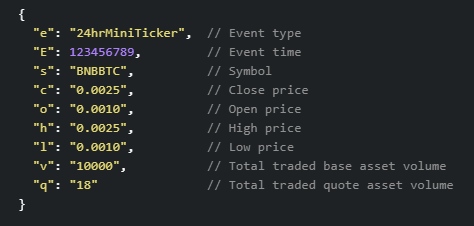

### Option 1: ThreadedWebsocketManager (only executable in scripts, not in Jupyter!):

In [87]:
from binance import ThreadedWebsocketManager

In [ ]:
twm = ThreadedWebsocketManager()
twm.start()

In [ ]:
def simple_bot(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = float(msg["c"])
    
    print("Time: {} | Price: {}".format(time, price))
    
    if int(price) % 10 == 0:
        order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.1)
        print("\n" + 50 * "-")
        print("Buy {} BTC for {} USDT".format(order["executedQty"], order["cummulativeQuoteQty"]))
        print(50 * "-" + "\n")
        
        twm.stop() # stop defined inside callback

In [ ]:
twm.start_symbol_miniticker_socket(callback = simple_bot, symbol = "BTCUSDT")
twm.join() # required if stop is defined in callback function

-----------------------------

### Option 2: BinanceSocketManager (executable in Jupyter!): 

In [97]:
import asyncio
from binance import AsyncClient, BinanceSocketManager

In [98]:
stop_streaming = False # setting a stop_streaming variable (initially: False)

In [99]:
def simple_bot(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = float(msg["c"])
    
    print("Time: {} | Price: {}".format(time, price))
    
    if int(price) % 10 == 0:
        order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.1)
        print("\n" + 50 * "-")
        print("Buy {} BTC for {} USDT".format(order["executedQty"], order["cummulativeQuoteQty"]))
        print(50 * "-" + "\n")
        
        global stop_streaming
        stop_streaming = True  # stop defined inside callback

In [100]:
async def main():
    client = await AsyncClient.create()
    bm = BinanceSocketManager(client)
    ts = bm.symbol_miniticker_socket(symbol="BTCUSDT")
    
    async with ts as tscm:
        while True:
            res = await tscm.recv()
            simple_bot(res)
            
            if stop_streaming:
                break

    await client.close_connection()

In [101]:
await main()

Time: 2024-10-18 23:14:51.318000 | Price: 68334.03
Time: 2024-10-18 23:14:53.346000 | Price: 68334.02
Time: 2024-10-18 23:14:53.474000 | Price: 68334.02
Time: 2024-10-18 23:14:55.378000 | Price: 68334.03
Time: 2024-10-18 23:14:56 | Price: 68334.02
Time: 2024-10-18 23:14:56.635000 | Price: 68334.03
Time: 2024-10-18 23:14:57.937000 | Price: 68334.02
Time: 2024-10-18 23:14:58.532000 | Price: 68334.02
Time: 2024-10-18 23:15:00.112000 | Price: 68334.02
Time: 2024-10-18 23:15:00.870000 | Price: 68334.03
Time: 2024-10-18 23:15:01.856000 | Price: 68337.99
Time: 2024-10-18 23:15:03.456000 | Price: 68338.0
Time: 2024-10-18 23:15:03.964000 | Price: 68337.99
Time: 2024-10-18 23:15:05.395000 | Price: 68338.0
Time: 2024-10-18 23:15:06.022000 | Price: 68338.0
Time: 2024-10-18 23:15:06.862000 | Price: 68338.0
Time: 2024-10-18 23:15:07.939000 | Price: 68337.99
Time: 2024-10-18 23:15:09.341000 | Price: 68337.99
Time: 2024-10-18 23:15:11.209000 | Price: 68337.99
Time: 2024-10-18 23:15:12.169000 | Price: 

BinanceAPIException: APIError(code=-2010): Account has insufficient balance for requested action.

In [ ]:
client.get_account() 